# 05. ROC 곡선과 AUC

<br>

# 1. ROC 곡선 (Receiver Operation Characteristic Curve)

- 이진 분류의 예측 성능 측정에 중요하게 사용되는 지표  
  
  
- 우리말 : 수신자 판단 곡선  
(2차 대전 시 통신 장비 성능 평가를 위해 고안된 수치)  
- 의학 분야에 많이 사용
- 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표  
  
  
- ROC 곡선은 FPR이 변할 때 TPR이 어떻게 변하는 지를 나타내는 곡선
- FPR을 X축으로, TPR을 Y축으로 놓아 FPR 변화에 따른 TPR의 변화가 곡선 형태로 나타남

<br>

## 1.1 TPR (True Positive Rate); 민감도(재현율)

- TPR은 **재현율**을 나타냄
- TPR은 **민감도(Sensitivity)**라고도 불림  

$
\quad
TPR = TP \, / \, (TP + FN)  
$
  
- 민감도(TPR)은 실제값 Positive(양성)가 정확히 예측돼야 하는 수준을 나타냄
- ex) 질병이 있는 사람은 질병이 있는 것으로 양성 판정

<br>

## 1.2 TNR (True Negative Rate); 특이성

- 민감도(TPR)에 대응하는 지표
- TNR은 **특이성(Specificity)**이라고도 불림  

$
\quad
TNR = TN \, / \, (TN + FP)
$ 
  
- 특이도(TNR)는 실제값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타냄
- ex) 질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정

<br>

## 1.3 FPR (False Positive Rate)

- FPR은 ROC 곡선의 X축 기준
- FPR = FP / (FP + TN)
- FPR = 1 - TNR 
- FPR = 1 - 특이성

<br>

## 1.4 ROC 곡선의 예

<div style='text-align: left; margin-left: 20px;'>
    <img src='./images/Ch03/05/img001.jpg' width='400px'/>
</div>

### 1.4.1 ROC 곡선의 가운데 직선

- ROC 곡선의 최저 값
- 왼쪽 하단과 오른쪽 상단을 대각선으로 이은 직선
- 동전을 무작위로 던져 앞/뒤를 맞추는 랜덤 수준의 이진 분류의 ROC 직선 (AUC = 0.5)  
  
  
- ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것
- 멀어질수록 성능이 뛰어난 것이다.

<br>

## 1.5 ROC 곡선 그리는 방법

- ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화 값을 구함
- 어떻게 FPR을 0부터 1까지 변경할 수 있을까?  
$\Rightarrow$ **분류 경계 임곗값을 변경**

<br>

### 1.5.1 FPR을 0으로 만들기

- 분류 결정 임곗값을 1로 지정
- 임곗값을 1로 지정하면 Positive 예측 기준이 매우 높아진다.  
$\rightarrow$ 분류기(Classifier)가 임곗값보다 높은 확률을 가진 데이터를 Positive로 예측할 수 없음  
  
  
- FPR = FP / (FP + TN)
- 위 식에서 아예 Positive로 예측하지 않기 때문에 FP 값이 0이 된다.
- 따라서 FPR값도 0이 된다.

<br>

### 1.5.2 FPR을 1로 만들기

- 분류 결정 임곗값을 0으로 지정
- 임곗값을 0으로 지정하면 분류기의 Positive 확률 기준이 너무 낮아져서 전부 Positive로 예측하게 됨
- 그럼 아예 Negative 예측이 없어진다. $\Rightarrow$ TN $\rightarrow$ 0
  
  
- FPR = FP / (FP + TN)
- 위 식에서 TN = 0 이 되면 FPR 값은 1이 된다.


<br>

## 1.6 `roc_curve()`

- 사이킷런에서 ROC 곡선을 구하기 위한 API
- 사용법은 `precision_recall_curve()` API와 유사 (반환값만 다름)

<br>

### 1.6.1 입력 파라미터

- `y_true` : 실제 클래스 값 array (array shape = [데이터 건수])
- `y_score` : `predict_proba()`의 반환 값 array에서 Positive 컬럼의 예측 확률이 보통 사용됨 (array shape = [n_samples])

<br>

### 1.6.2 반환 값

- `fpr` : fpr 값을 array로 반환 (X축 값)
- `tpr` : tpr 값을 array로 반환 (Y축 값)
- `thresholds` : threshold 값 array

<br>

### 1.6.3 타이타닉 생존자 예측 모델 이용, FPR, TPR, 임곗값 확인

In [1]:
# Null 처리 함수
def fillna(df) :
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df) :
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    
    return df

# 레이블 인코딩 수행
from sklearn.preprocessing import LabelEncoder

def format_features(df) :
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df) :
    
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

C:\Users\shkim\AppData\Local\conda\conda\envs\TF_VS_36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
from sklearn.metrics import roc_curve
import numpy as np

# 레이블 값이 1일 때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개 : ', thr_index)
print('샘플용 10개의 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개 :  [ 0  5 10 15 20 25 30 35 40 45]
샘플용 10개의 임곗값 :  [1.94 0.87 0.63 0.55 0.44 0.32 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR :  [0.    0.008 0.025 0.059 0.127 0.203 0.559 0.602 0.695 0.847]
샘플 임곗값별 TPR :  [0.    0.246 0.672 0.738 0.787 0.885 0.902 0.951 0.967 0.984]


In [6]:
import pandas as pd

df = pd.DataFrame({'threshold': np.round(thresholds[thr_index],2),
                   'FPR': np.round(fprs[thr_index], 3),
                   'TPR': np.round(tprs[thr_index], 3)})
df

,threshold,FPR,TPR
0,1.94,0.000,0.000
1,0.87,0.008,0.246
2,0.63,0.025,0.672
3,0.55,0.059,0.738
4,0.44,0.127,0.787
5,0.32,0.203,0.885
6,0.15,0.559,0.902
7,0.14,0.602,0.951
8,0.13,0.695,0.967
9,0.12,0.847,0.984


$\rightarrow$ 임곗값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커짐  
$\rightarrow$ FPR이 조금씩 커질 때, TPR은 가파르게 커짐을 알 수 있음

<br>

### 1.6.4 ROC 곡선 시각화

- FPR의 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def roc_curve_plot(y_test, pred_proba_c1) :
    
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    
    # 가운데 대각선 직선을 그림
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

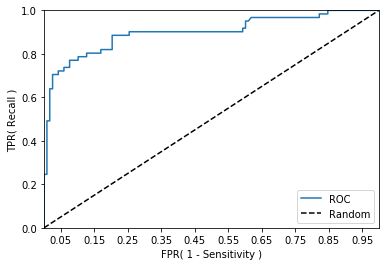

In [10]:
pred_proba = lr_clf.predict_proba(X_test)
roc_curve_plot(y_test, pred_proba[:, 1])

<br>

# 2. AUC

## 2.1 AUC (Area Under Curve)

- ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용
- 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정  
  
  
- AUC값은 ROC 곡선 밑의 면적을 구한 것
- 일반적으로 1에 가까울수록 좋은 수치이다.  
  
  
- AUC 수치가 커지려면 RPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건이다.
- 가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할 수록 직사각형에 가까운 곡선이 됨  
(면적이 1에 가까워짐)  
  
  
- 가운데 대각선 직선
  - 랜덤 수준의(동전 던지기 수준) 이진 분류 AUC 값 (0.5)
  - 따라서 보통의 분류는 0.5 이상의 AUC 값을 가리킴

<br>

## 2.2 `roc_auc_score()`

- 사이킷런은 ROC AUC를 구하기 위해 제공하는 API

In [11]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.8429


<br>

`get_clf_eval()` 함수에 ROC AUC 값을 측정하는 로직 추가

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred) :
    
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    
    auc = roc_auc_score(y_test, pred)
    
    print('오차 행렬')
    print(confusion)
    
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, ROC AUC : {4:.4f}'.format(accuracy, precision, recall, f1, auc))

In [13]:
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705, F1 : 0.7966, ROC AUC : 0.8429
